# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Loading the dataset

In [2]:
df = pd.read_csv('heart.csv')

# 3. Exploratory Data Analysis

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
new_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach', 'exang', 
               'oldpeak', 'slope', 'ca', 'thal', 'target']

In [5]:
df.columns = new_columns

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Checking for null values

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking for unique values

In [10]:
unique_number = []

for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns=['Unique Values'])

,Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


* According to the result from the unique value dataframe;
* We determined the variables with few unique values ​​as categorical variables, and the variables with high unique values ​​as numeric variables.
* In this context, Numeric Variables: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
* Categorical Variables: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"

In [11]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### Examining Statistics of Variables

In [12]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

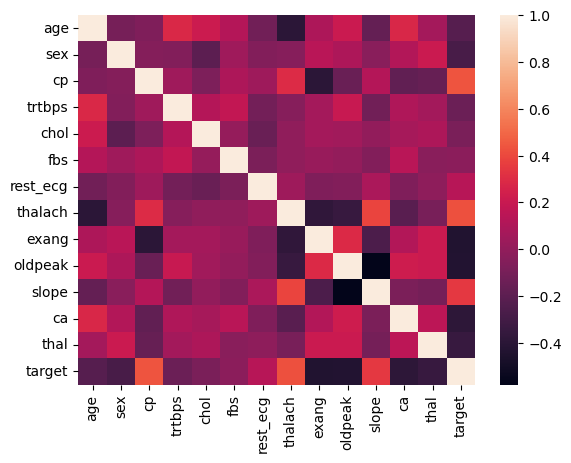

In [13]:
sns.heatmap(df.corr())

## No significant Correlation Between any of the independent variables

## Let's Check the skewness of Numeric Features

In [14]:
stats = df[numeric_var].max() - df[numeric_var].min()
(df[numeric_var].mean() - stats)

age          6.366337
trtbps      25.623762
chol      -191.735974
thalach     18.646865
oldpeak     -5.160396
dtype: float64

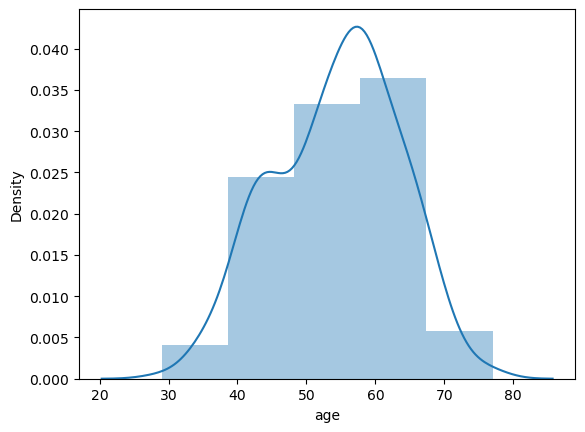

In [15]:
sns.distplot(df["age"], bins = 5);

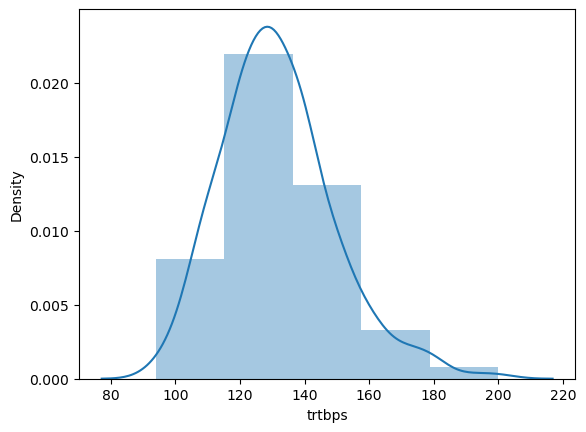

In [16]:
sns.distplot(df["trtbps"], bins = 5);

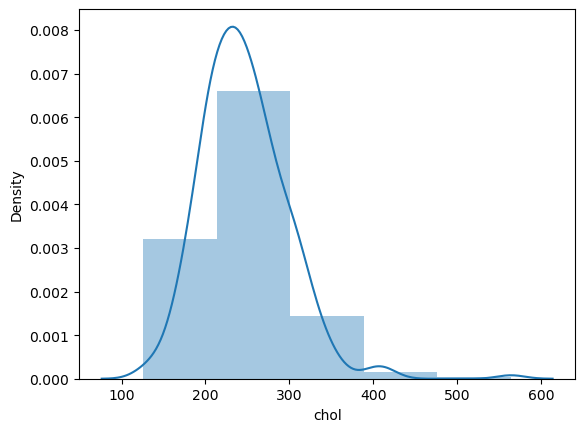

In [17]:
sns.distplot(df["chol"], bins = 5);

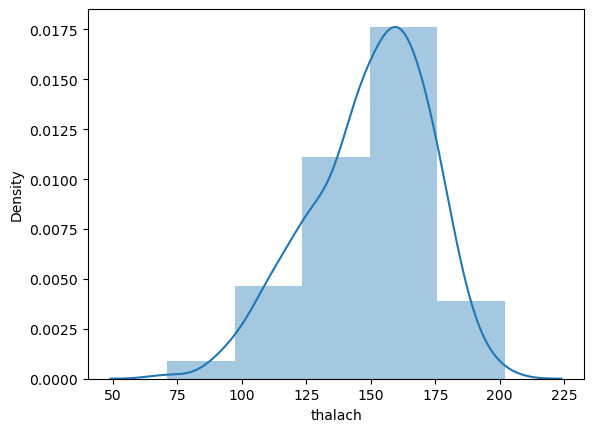

In [18]:
sns.distplot(df["thalach"], bins = 5);

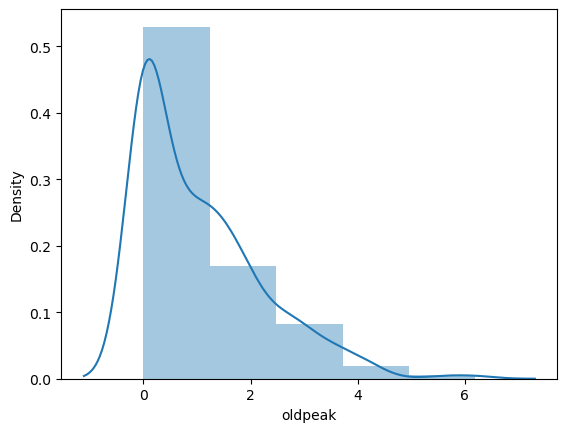

In [19]:
sns.distplot(df["oldpeak"], bins = 5);

### Column age, chol, trtbps, thalach, oldpeak are skewed hence we will take log of these columns  

In [20]:
df['age'] = np.log(df['age'])

In [21]:
df['chol'] = np.log(df['chol'])

In [22]:
df['trtbps'] = np.log(df['trtbps'])

In [23]:
df['thalach'] = np.log(df['thalach'])

In [24]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,4.143135,1,3,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1,1
1,3.610918,1,2,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2,1
2,3.713572,0,1,4.867534,5.318120,0,0,5.147494,0,1.4,2,0,2,1
3,4.025352,1,1,4.787492,5.463832,0,1,5.181784,0,0.8,2,0,2,1
4,4.043051,0,0,4.787492,5.869297,0,1,5.093750,1,0.6,2,0,2,1


## Extracting features and target

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# 4. Training and testing dataset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal
124,3.663562,0,2,4.543295,5.293305,0,1,5.187386,0,0.0,2,0,2
72,3.367296,1,1,4.867534,5.318120,0,0,5.308268,0,0.0,2,0,2
15,3.912023,0,2,4.787492,5.389072,0,1,5.062595,0,1.6,1,0,2
10,3.988984,1,0,4.941642,5.476464,0,1,5.075174,0,1.2,2,0,2
163,3.637586,1,2,4.927254,5.164786,0,1,5.153292,0,0.0,2,4,2


In [29]:
y_train.head()

124    1
72     1
15     1
10     1
163    1
Name: target, dtype: int64

## Standardizing the features

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

# 5. Model building 

### building logistics-regression model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred_lr = lr.predict(X_test)

### checking the accuracy of the model

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print(round(accuracy_score(y_test, y_pred_lr)*100,2),'%')

80.22 %


### Fine tuning model

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {
                "penalty":["l1","l2"],
                "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }

In [42]:
log_reg_grid = GridSearchCV(lr, param_grid = parameters)

In [43]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [44]:
print("Best Parameters: ", log_reg_grid.best_params_)

Best Parameters:  {'penalty': 'l1', 'solver': 'saga'}


In [46]:
log_reg_best = LogisticRegression(penalty = "l1", solver = "saga")
log_reg_best

LogisticRegression(penalty='l1', solver='saga')

In [47]:
log_reg_best.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [48]:
y_pred = log_reg_best.predict(X_test)

In [49]:
print(round(accuracy_score(y_test, y_pred)*100,2),'%')

81.32 %


### Building decision tree classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [52]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [53]:
y_pred_dt = dec_tree.predict(X_test)

In [54]:
print(round(accuracy_score(y_test, y_pred_dt)*100,2),'%')

73.63 %


### Fine tuning model

In [55]:
param_grid = {
    'max_depth': [None, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [56]:
dec_tree_ft = GridSearchCV(dec_tree, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

In [57]:
dec_tree_ft.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [58]:
print('Best Parameters: ',dec_tree_ft.best_params_)

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [59]:
best_dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=4, min_samples_split=2)

In [60]:
best_dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4)

In [61]:
y_pred_best_dt = best_dec_tree.predict(X_test)

In [62]:
print(round(accuracy_score(y_test, y_pred_best_dt)*100,2),'%')

74.73 %


### Random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
random_forest = RandomForestClassifier(random_state = 5)

In [65]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [66]:
y_pred = random_forest.predict(X_test)

In [70]:
print(round(accuracy_score(y_test, y_pred)*100,2),'%')

80.22 %


In [96]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 10],
    'max_features': ['auto', 'sqrt', 'log2', 0.5],
    'bootstrap': [True, False]
}

In [97]:
random_forest_grid = GridSearchCV(random_forest, param_grid = parameters)

In [98]:
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [99]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 50}


In [100]:
best_random_forest = RandomForestClassifier(bootstrap = True, criterion = "entropy", max_features = "auto", n_estimators = 50, random_state = 5)

In [101]:
best_random_forest.fit(X_train, y_train)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [102]:
y_pred = best_random_forest.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [103]:
accuracy_score(y_test, y_pred)

0.7912087912087912

7. Project Conclusion
The activities we carried out within the scope of the project are as follows:

* Within the scope of the project, we first made the data set ready for Exploratory Data Analysis(EDA)
* We performed Exploratory Data Analysis(EDA).
* We analyzed numerical and categorical variables within the scope of univariate analysis by using Distplot and Pie   Chart graphics.
* Within the scope of bivariate analysis, we analyzed the variables among each other using FacetGrid, Count Plot,     Pair Plot, Swarm plot, Box plot, and Heatmap graphics.
* We made the data set ready for the model. In this context, we struggled with missing and outlier values.
* We used four different algorithms in the model phase.
* We got 87% accuracy and 88% AUC with the Logistic Regression model.
* We got 83% accuracy and 85% AUC with the Decision Tree Model.
* We got 83% accuracy and 89% AUC with the Support Vector Classifier Model.
* And we got 90.3% accuracy and 93% AUC with the Random Forest Classifier Model.
* When all these model outputs are evaluated, we prefer the model we created with the Random Forest Algorithm,       which gives the best results. See you in the next project.